In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.regression.linear_model as sml
import statsmodels.nonparametric.smoothers_lowess as sms

%matplotlib inline

In [ ]:
dataset = pandas.read_csv('data.csv')

In [9]:
dataset[['male_residents', 'b_residents_percent']].corr()

,male_residents,b_residents_percent
male_residents,1.000000,0.153936
b_residents_percent,0.153936,1.000000


In [10]:
county_means['male_residents'].describe()

count     688.000000
mean       61.224516
std       162.912744
min         0.557000
25%         8.079000
50%        17.150500
75%        46.618750
max      2525.379000
Name: male_residents, dtype: float64

In [22]:
county_means[inc_controls].corr()

,inc_mean,binc_under20_percent,winc_under20_percent,b_unemp,w_unemp
inc_mean,1.000000,-0.358276,-0.773777,-0.073037,-0.289839
binc_under20_percent,-0.358276,1.000000,0.304627,0.120280,0.054279
winc_under20_percent,-0.773777,0.304627,1.000000,-0.032156,0.391425
b_unemp,-0.073037,0.120280,-0.032156,1.000000,0.159718
w_unemp,-0.289839,0.054279,0.391425,0.159718,1.000000


In [20]:
# Correlations
county_means[['com_mis', 'com_col', 'tech_typ_vpat', 'tech_typ_vveh', 'percent_males_black', 'percent_males_white']].corr()

var1 = 'percent_males_black'
var2 = 'percent_males_white'

data = county_means[numpy.isfinite(county_means[var1])]
data = data[numpy.isfinite(data[var2])]

pearsonr(data[var1], data[var2])

(-0.90027369050333661, 5.6856813300846206e-250)

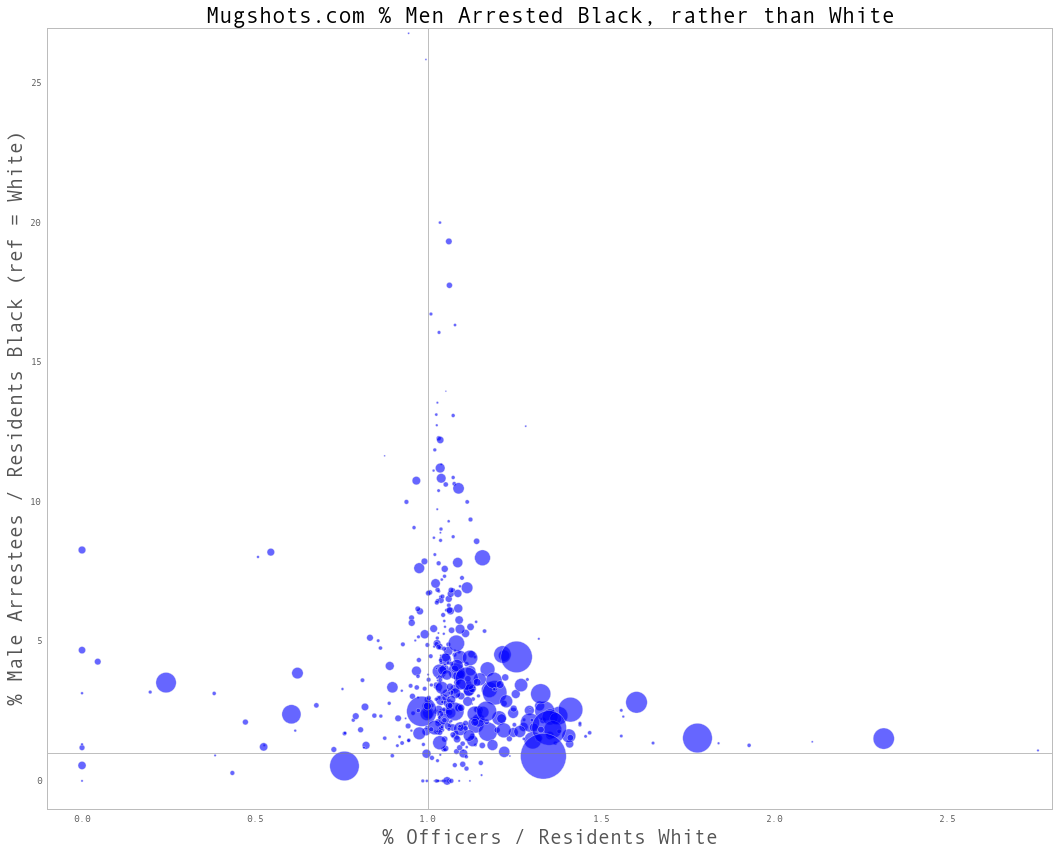

In [56]:
# To graph county mean arrests by % officers divided by residents white

#dataset['black_not_white_residents'] = dataset['b_residents_percent'] / (dataset['b_residents_percent'] + dataset['w_residents_percent'])
dataset['black_not_white_males'] = dataset['percent_males_black'] / (dataset['percent_males_black'] + dataset['percent_males_white'])
county_means = dataset.groupby('county_no').mean()
#county_means = dataset[dataset['disorder'] == 1].groupby('county_no').mean()

#nibrs_arrests_county['black_not_white_males'] = nibrs_arrests_county['percent_males_black'] / (nibrs_arrests_county['percent_males_black'] + nibrs_arrests_county['percent_males_white'])
county_means = nibrs_arrests_county.groupby('county_no').mean()

iv = county_means['wofficers_divres']
w_arrests = county_means['black_not_white'] / county_means['black_not_white_males']

county_size = county_means['male_residents']

plt.scatter(iv, w_arrests, s = county_size, alpha = 0.6)

plt.ylim(-1, 27)
plt.xlim(-0.1, 2.8)
# to 8 for NIBRS
# plt.ylim(-0.3, 10)
# plt.xlim(0.7, 1.5)

plt.xlabel('% Officers / Residents White', size = 20)
plt.ylabel('% Male Arrestees / Residents Black (ref = White)', size = 20)
plt.title('Mugshots.com % Men Arrested Black, rather than White', size = 22)

plt.plot([1, 1], [-100, 100], '-', c = 'gray', alpha = 0.5)
plt.plot([-100, 100], [1, 1], '-', c = 'gray', alpha = 0.5)
pylab.rcParams['figure.figsize'] = 18, 14

plt.savefig('../Figures_Output/Draft 3/figures/mugshots.png', dpi = 800)

### Plotting distribution of DVs

In [ ]:
county_means['white_only_ighisp'].plot(kind = 'hist', alpha = 0.75, bins = 200)

In [ ]:
# To graph county mean arrests by IV (% officers minus residents white)
county_means = dataset.groupby('county_no').mean()

iv = county_means['wofficers_divres']
w_arrests = (county_means['white_only_ighisp'] * 100) / county_means['w_residents_percent']

# To weight all counties equally
#county_size = 30
# To weight counties by number of residents
county_size = county_means['total_residents']

plt.scatter(iv, w_arrests, s = county_size, alpha = 0.6)
plt.ylim(-0.2, 1.5)
plt.xlim(-0.1, 1.8)
plt.xlabel('% Officers / Residents White', size = 20)
plt.ylabel('% Arrestees / Residents White', size = 20)
plt.title('% Arrestees White, Mugshots.com', size = 22)

plt.plot([1, 1], [-100, 100], '-', c = 'gray', alpha = 0.5)
plt.plot([-100, 100], [1, 1], '-', c = 'gray', alpha = 0.5)
pylab.rcParams['figure.figsize'] = 18, 14

plt.savefig('fig.png', dpi = 600)

In [ ]:
# % White arrests by % officers minus residents White
#plt.scatter(dataset.wofficers_minusres, dataset.arrests_w_percent, s = 6)
x = dataset.wofficers_minusres[dataset.wofficers_minusres.notnull()][dataset.arrests_w_percent.notnull()]
y = dataset.arrests_w_percent[dataset.wofficers_minusres.notnull()][dataset.arrests_w_percent.notnull()]
m, b = numpy.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.plot([0, 0], [0, 110], label = 'Equal officers and residents')
plt.legend(fontsize = 6, loc = 'upper left')
plt.xlim(-95, 55)
plt.ylim(0, 102)
plt.title('% Officers and Arrests White', size = 10)
plt.xlabel('% Officers minus % Residents White', size = 8)
plt.ylabel('% Arrests White', size = 8)
#plt.savefig('../Text/Draft2/figures/off_arrests_w_line.png', dpi = 800)
#plt.close()

In [ ]:
# % White arrests minus residents by % officers minus residents White
plt.scatter(dataset.wofficers_minusres, dataset.arrests_w_prop_aminusr, s = 6)

x = dataset.wofficers_minusres[dataset.wofficers_minusres.notnull()][dataset.arrests_w_prop_aminusr.notnull()]
y = dataset.arrests_w_prop_aminusr[dataset.wofficers_minusres.notnull()][dataset.arrests_w_prop_aminusr.notnull()]
m, b = numpy.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

plt.plot([0, 0], [-110, 110], label = 'Equal officers and residents')
plt.legend(fontsize = 6, loc = 'upper left')
plt.xlim(-95, 55)
plt.ylim(-102, 102)
plt.title('% Officers and Arrests White', size = 10)
plt.xlabel('% Officers minus % Residents White', size = 8)
plt.ylabel('% Arrests White', size = 8)
plt.savefig('off_arrests_minus_w_line.png', dpi = 800)
plt.close()

### Plotting the Residuals against each other to control for other factors

In [ ]:
control_vars = controls + inc_controls + fewpd_controls + ['arrest_id_count']
small_data = dataset[['w_arrest_id_count', 'w_officers_percent_calc'] + control_vars]
small_data = small_data.dropna(how = 'any')

Y = small_data['w_arrest_id_count']
X1 = small_data['w_officers_percent_calc']
X2 = small_data[control_vars]
X2 = sm.add_constant(X2)

X_all = small_data[['w_officers_percent_calc'] + control_vars]
X_all = sm.add_constant(X_all)

In [ ]:
# Predict X1 by X2
X1_resid = sml.OLS(X1, X2, missing = 'drop').fit().resid
Y_resid = sml.OLS(Y, X2, missing = 'drop').fit().resid

In [ ]:
plt.close()
m, b = numpy.polyfit(X1_resid, Y_resid, 1)
plt.plot(X1_resid, Y_resid, '.', ms = 4)
plt.plot(X1_resid, m * X1_resid + b, '-')

lowess_data = pandas.DataFrame(sms.lowess(Y_resid, X1_resid, missing = 'drop', return_sorted = True, frac = .2))
plt.plot(lowess_data[0], lowess_data[1], 'g-', label = 'Lowess')

plt.legend(fontsize = 6, loc = 'upper left')
plt.xlim(-35, 30)
plt.ylim(-100, 100)
plt.title('% Officers and Arrests White', size = 10)
plt.xlabel('% Officers minus % Residents White', size = 8)
plt.ylabel('% Arrests minus % Residents White', size = 8)